In [85]:
import mne
import mne.io

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [87]:
data_path = "/home/pfilipia/inria/chu_nice_inria/patients_ecog"
patient01_path_prefix = data_path + "/patient01/20180507_1240"

events_data = pd.read_csv(
    "%s_events.csv" % patient01_path_prefix, header=0
)

raw = mne.io.read_raw_cnt(
    input_fname="%s_neuroscan.cnt" % patient01_path_prefix, montage=None
)

  Could not parse meas date from the header. Setting to None.


<ipython-input-87-d22385409a56>:9: RuntimeWarning:   Could not parse meas date from the header. Setting to None.
  input_fname="%s_neuroscan.cnt" % patient01_path_prefix, montage=None
/home/patrykfi/anaconda3/envs/mne/lib/python3.6/site-packages/mne/channels/layout.py:737: RuntimeWarning: invalid value encountered in true_divide
  xs /= sqs  # Shape to a sphere and normalize
/home/patrykfi/anaconda3/envs/mne/lib/python3.6/site-packages/mne/channels/layout.py:738: RuntimeWarning: invalid value encountered in true_divide
  ys /= sqs


In [89]:
# raw.info['bads'] = ['STI 014', 'e2']
raw.load_data()
# raw.filter(l_freq=0.5, h_freq=1000)
# raw.notch_filter(freqs=50, notch_widths=9)


Reading 0 ... 1866152  =      0.000 ...   911.207 secs...


<RawCNT  |  20180507_1240_neuroscan.cnt, n_channels x n_times : 15 x 1866153 (911.2 sec), ~213.6 MB, data loaded>

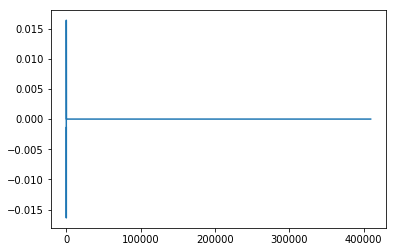

In [116]:
stim_id = 0

events_range = np.arange(
    events_data.loc[stim_id]['time_begin'],
    events_data.loc[stim_id]['time_end'],
    events_data.loc[stim_id]['time_interval']
)

t_start = events_range[1]

raw_copy = raw.copy().crop(
    tmin = t_start, 
    tmax = t_start + 1000*events_data.loc[stim_id]['time_interval']
).drop_channels(['e2', 'e3', 'e4', 'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'STI 014'])

data = raw_copy.get_data().T
data[10:] = 0

# raw_copy.plot(n_channels=1, scalings={'eeg': 0.01})
plt.plot(data)

In [117]:
ch_types = ['eeg']
ch_names = ['artifact']

info = mne.create_info(ch_names=ch_names, sfreq=raw.info['sfreq'], ch_types=ch_types)
raw_artifact = mne.io.RawArray(data.T, info)

Creating RawArray with float64 data, n_channels=1, n_times=409396
    Range : 0 ... 409395 =      0.000 ...   199.900 secs
Ready.


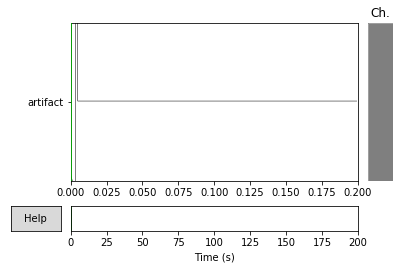

In [118]:
raw_artifact.plot(n_channels=1, duration=events_data.loc[stim_id]['time_interval'], scalings={'eeg': 0.001})
None

Setting up band-pass filter from 0.5 - 1e+03 Hz
l_trans_bandwidth chosen to be 0.5 Hz
h_trans_bandwidth chosen to be 24.0 Hz
Filter length of 13517 samples (6.600 sec) selected
Setting up band-stop filter from 45 - 55 Hz
Filter length of 13517 samples (6.600 sec) selected


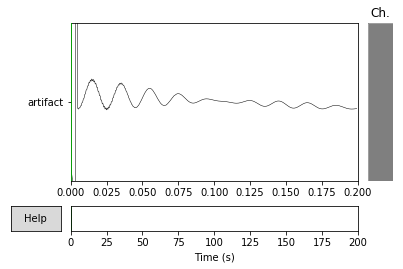

In [119]:
raw_artifact.filter(l_freq=0.5, h_freq=1000)
raw_artifact.notch_filter(freqs=50, notch_widths=9)
raw_artifact.plot(n_channels=1, duration=events_data.loc[stim_id]['time_interval'], scalings={'eeg': 0.001})
None

In [80]:
t_event_1_beg = events_data.loc[stim_id]['time_begin'] + events_data.loc[stim_id]['time_interval']
t_event_1_end = events_data.loc[stim_id]['time_end'] - events_data.loc[stim_id]['time_interval']
t_interval = events_data.loc[stim_id]['time_interval']

events = np.empty((0, 3), dtype=int)

for t_start in np.arange(t_event_1_beg, t_event_1_end, t_interval):
    events = np.vstack([
        events, 
        np.array([raw.time_as_index(t_start), 0, 1], dtype=int)
    ])

event_id = dict(stimulation=1)

t_min = 0
t_max = events_data.loc[stim_id]['time_interval']

epochs = mne.Epochs(raw, events, event_id, t_min, t_max, baseline=(events_data.loc[stim_id]['time_interval'] - 0.005, events_data.loc[stim_id]['time_interval']))

21 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


Loading data for 21 events and 410 original time points ...
0 bad epochs dropped
Loading data for 21 events and 410 original time points ...
Loading data for 20 events and 410 original time points ...


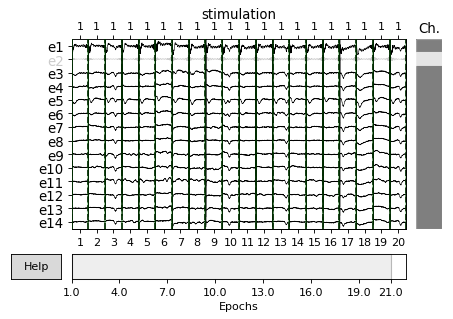

OK


In [81]:
epochs.get_data()
epochs.plot(n_channels=15, scalings={'eeg': 0.001})

print("OK")

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-82-a44c06ede7b3>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average(picks=[i]).crop(tmin=0.01).plot()


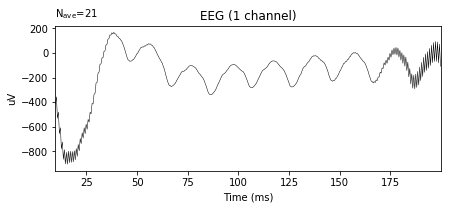

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-82-a44c06ede7b3>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average(picks=[i]).crop(tmin=0.01).plot()
/home/patrykfi/anaconda3/envs/mne/lib/python3.6/site-packages/mne/viz/evoked.py:238: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if this_type in types:


<Figure size 460.8x144 with 0 Axes>

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-82-a44c06ede7b3>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average(picks=[i]).crop(tmin=0.01).plot()


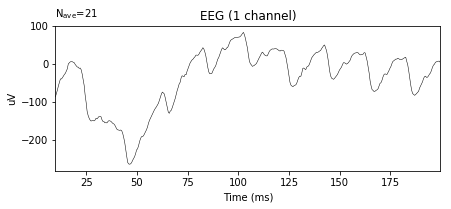

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-82-a44c06ede7b3>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average(picks=[i]).crop(tmin=0.01).plot()


Need more than one channel to make topography for eeg. Disabling interactivity.


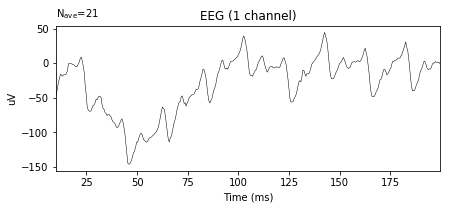

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-82-a44c06ede7b3>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average(picks=[i]).crop(tmin=0.01).plot()


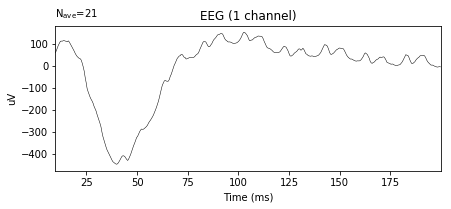

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-82-a44c06ede7b3>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average(picks=[i]).crop(tmin=0.01).plot()


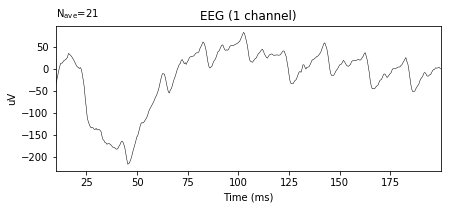

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-82-a44c06ede7b3>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average(picks=[i]).crop(tmin=0.01).plot()


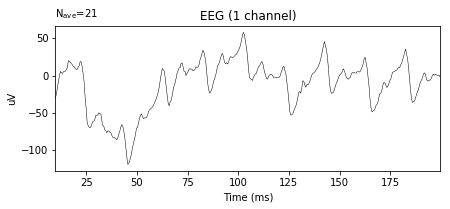

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-82-a44c06ede7b3>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average(picks=[i]).crop(tmin=0.01).plot()


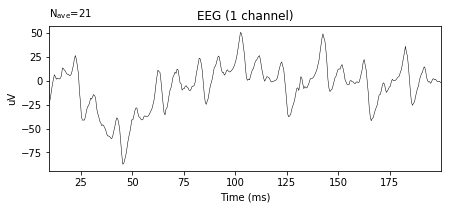

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-82-a44c06ede7b3>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average(picks=[i]).crop(tmin=0.01).plot()


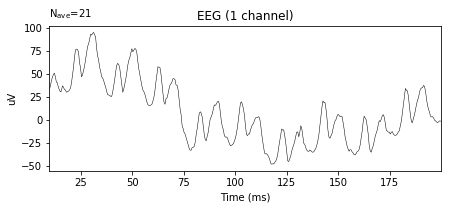

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-82-a44c06ede7b3>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average(picks=[i]).crop(tmin=0.01).plot()


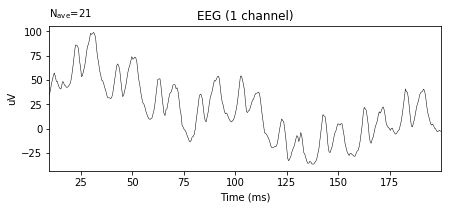

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-82-a44c06ede7b3>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average(picks=[i]).crop(tmin=0.01).plot()


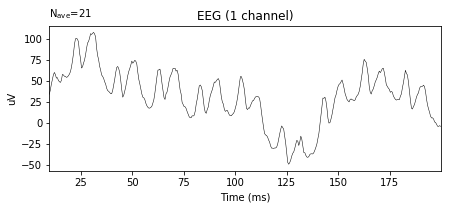

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-82-a44c06ede7b3>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average(picks=[i]).crop(tmin=0.01).plot()


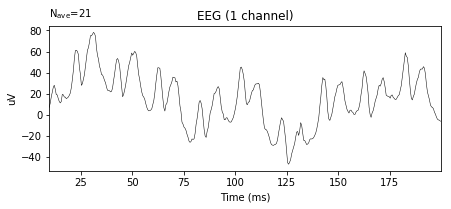

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-82-a44c06ede7b3>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average(picks=[i]).crop(tmin=0.01).plot()


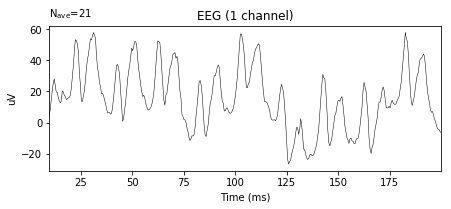

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-82-a44c06ede7b3>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average(picks=[i]).crop(tmin=0.01).plot()


Need more than one channel to make topography for eeg. Disabling interactivity.


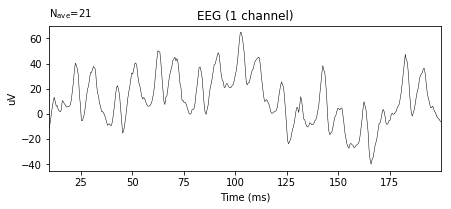

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-82-a44c06ede7b3>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average(picks=[i]).crop(tmin=0.01).plot()
/home/patrykfi/anaconda3/envs/mne/lib/python3.6/site-packages/mne/viz/evoked.py:238: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if this_type in types:


<Figure size 460.8x144 with 0 Axes>

In [82]:
for i in range(15):
    epochs.average(picks=[i]).crop(tmin=0.01).plot()


time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-83-23a8dd4419c4>:1: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  epochs.average(picks=[4]).crop(tmin=0.01).plot()


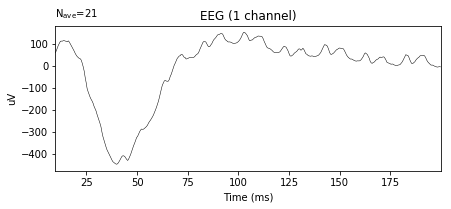

In [83]:
epochs.average(picks=[4]).crop(tmin=0.01).plot()
None